In [1]:
import pandas as pd
import numpy as np

Construction de la base de modélisation

In [ ]:
    dfhisto = pd.DataFrame()
    for i in range(8):
        section = pd.read_csv('C:/Users/Square 769/Documents/SIRENE/072019/StockUniteLegaleHistorique_utf8.csv', 
                                encoding = 'utf8',
                                skiprows = range(1, 10000000 * i),
                                nrows = 10000000,
                               low_memory = True)
        section = section[(section['categorieJuridiqueUniteLegale'] > 5400) & (section['categorieJuridiqueUniteLegale'] < 5500)]
        print(i, "---", section.shape)
        dfhisto = dfhisto.append(section, ignore_index = True)

In [ ]:
dfhisto.to_csv('C:/Users/Square 769/Documents/SIRENE/072019/LEGALUNIT_HISTO_010819.csv', encoding = 'utf-8', index = False)

In [ ]:
# Importer la table Historique
dfhisto = pd.read_csv('C:/Users/Square 769/Documents/SIRENE/072019/LEGALUNIT_HISTO_010819.csv', encoding = 'utf-8')
dfhisto.head(10)

In [ ]:
dfhisto.shape
dfhisto.columns

In [ ]:
dfhisto['dateDebut'] = dfhisto['dateDebut'].astype('str')
dfhisto['annee_debut'] = dfhisto['dateDebut'].apply(lambda x: x[:4])

In [ ]:
# Création du SIRET
dfhisto['SIRET'] = dfhisto['siren'] * 100000 + dfhisto['nicSiegeUniteLegale']

In [ ]:
dfhisto.columns

In [ ]:
# Extraction dates cessation activité
col_ = ['SIRET', 'annee_cessation']

cessation = dfhisto[dfhisto['etatAdministratifUniteLegale'] == "C"]
cessation = cessation[cessation['changementEtatAdministratifUniteLegale'] == True]

cessation['annee_cessation'] = cessation['annee_debut']
cessation = cessation[col_]
cessation.head(10)

cessation.index = cessation.SIRET

In [ ]:
# Extraction dates dernier changement de categorie juridique avant 2018
col_ = ['SIRET', 'annee_dern_changement_cat_ju']
chg_ju = dfhisto[dfhisto['etatAdministratifUniteLegale'] == "A"]
chg_ju = chg_ju[chg_ju['changementCategorieJuridiqueUniteLegale'] == True]
chg_ju['annee_dern_changement_cat_ju'] = chg_ju['annee_debut']
# Conserve la variables SIREN, NIC et date de dernier changement de catégorie juridique
chg_ju = chg_ju[col_]
# Trie par ordre décroissant des dates
chg_ju['annee_dern_changement_cat_ju'] = chg_ju['annee_dern_changement_cat_ju'].astype('float64')
chg_ju = chg_ju.sort_values(['SIRET', 'annee_dern_changement_cat_ju'], ascending = [1,0])
chg_ju = chg_ju[chg_ju['annee_dern_changement_cat_ju'] < 2019]
print(chg_ju.shape)
# Supprimer les doublons de SIRET
chg_ju.drop_duplicates(subset = ['SIRET'], keep = 'first', inplace = True)
print(chg_ju.shape)
chg_ju.index = chg_ju.SIRET

In [ ]:
# Extraction dates dernier changement activité avant 2018
col_ = ['SIRET', 'annee_dern_changement_activite']
chg_act = dfhisto[dfhisto['etatAdministratifUniteLegale'] == "A"]
chg_act = chg_act[chg_act['changementActivitePrincipaleUniteLegale'] == True]
chg_act['annee_dern_changement_activite'] = chg_act['annee_debut']
# Conserve la variables SIREN, NIC et date de dernier changement d'activité principale
chg_act = chg_act[col_]
# Trie par ordre décroissant des dates
chg_act['annee_dern_changement_activite'] = chg_act['annee_dern_changement_activite'].astype('float64')
chg_act = chg_act.sort_values(['SIRET', 'annee_dern_changement_activite'], ascending = [1,0])
chg_act = chg_act[chg_act['annee_dern_changement_activite'] < 2019]
print(chg_act.shape)
# Supprimer les doublons de SIRET
chg_act.drop_duplicates(subset = ['SIRET'], keep = 'first', inplace = True)
print(chg_act.shape)

chg_act.index = chg_act.SIRET

In [ ]:
# Extraction dates dernier changement dénomination légale de l'entreprise avant 2018
col_ = ['SIRET', 'annee_dern_changement_denomination']
chg_den = dfhisto[dfhisto['etatAdministratifUniteLegale'] == "A"]
chg_den = chg_den[chg_den['changementDenominationUniteLegale'] == True]
chg_den['annee_dern_changement_denomination'] = chg_den['annee_debut']
# Conserve la variables SIREN, NIC et date de dernier changement d'activité principale
chg_den = chg_den[col_]
# Trie par ordre décroissant des dates
chg_den['annee_dern_changement_denomination'] = chg_den['annee_dern_changement_denomination'].astype('float64')
chg_den = chg_den.sort_values(['SIRET', 'annee_dern_changement_denomination'], ascending = [1,0])
chg_den = chg_den[chg_den['annee_dern_changement_denomination'] < 2019]
print(chg_den.shape)
# Supprimer les doublons de SIRET
chg_den.drop_duplicates(subset = ['SIRET'], keep = 'first', inplace = True)
print(chg_den.shape)

chg_den.index = chg_den.SIRET

In [ ]:
# Extraction dates dernier changement Unité employeuse
col_ = ['SIRET', 'annee_dern_changement_emploi']
chg_emp = dfhisto[dfhisto['etatAdministratifUniteLegale'] == "A"]
chg_emp = chg_emp[chg_emp['changementCaractereEmployeurUniteLegale'] == True]
chg_emp['annee_dern_changement_emploi'] = chg_emp['annee_debut']
# Conserve la variables SIREN, NIC et date de dernier changement d'activité principale
chg_emp = chg_emp[col_]
# Trie par ordre décroissant des dates
chg_emp['annee_dern_changement_emploi'] = chg_emp['annee_dern_changement_emploi'].astype('float64')
chg_emp = chg_emp.sort_values(['SIRET', 'annee_dern_changement_emploi'], ascending = [1,0])
chg_emp = chg_emp[chg_emp['annee_dern_changement_emploi'] < 2019]
print(chg_emp.shape)
# Supprimer les doublons de SIRET
chg_emp.drop_duplicates(subset = ['SIRET'], keep = 'first', inplace = True)
print(chg_emp.shape)

chg_emp.index = chg_emp.SIRET

In [ ]:
# Economie sociale et solidaire
col_ = ['SIRET', 'annee_dern_eco_sociale']
chg_soc = dfhisto[dfhisto['etatAdministratifUniteLegale'] == "A"]
chg_soc = chg_soc[chg_soc['changementEconomieSocialeSolidaireUniteLegale'] == True]
chg_soc['annee_dern_eco_sociale'] = chg_soc['annee_debut']
# Conserve la variables SIREN, NIC et date de dernier changement d'activité principale
chg_soc = chg_soc[col_]
# Trie par ordre décroissant des dates
chg_soc['annee_dern_eco_sociale'] = chg_soc['annee_dern_eco_sociale'].astype('float64')
chg_soc = chg_soc.sort_values(['SIRET', 'annee_dern_eco_sociale'], ascending = [1,0])
print(chg_soc.tail(50))
chg_soc = chg_soc[chg_soc['annee_dern_eco_sociale'] < 2019]
print(chg_soc.shape)
# Supprimer les doublons de SIRET
chg_soc.drop_duplicates(subset = ['SIRET'], keep = 'first', inplace = True)
print(chg_soc.shape)

chg_soc.index = chg_soc.SIRET

In [ ]:
# Récupération du stock des SARL
sarl = pd.read_csv('C:/Users/Square 769/Documents/SIRENE/072019/LEGALUNIT_STOCK_010819.csv', encoding = 'utf-8')
sarl['SIRET'] = sarl['siren'] * 100000 + sarl['nicSiegeUniteLegale']
print(sarl.shape)

In [ ]:
# Supprimer les siren dont la date de création est inconnue
sarl = sarl.dropna(subset = ['dateCreationUniteLegale'], axis = 0)
print(sarl.shape)
# Année de création de l'unité
sarl['annee_creation'] = sarl['dateCreationUniteLegale'].apply(lambda x: x[:4])
# Exclusion des Unités Légales créées à partir de 2018
sarl['annee_creation'] = sarl['annee_creation'].astype('float64')
sarl = sarl[sarl['annee_creation'] < 2019]
print(sarl.shape)
# Exclusion des unités légales pour lesquelles les données historisées ont évolué entre 2018 et 2019
sarl['dateDebut'] = sarl['dateDebut'].astype('str')
sarl['annee_histo'] = sarl['dateDebut'].apply(lambda x: x[:4])
sarl['annee_histo'] = sarl['annee_histo'].astype('float64')
sarl = sarl[sarl['annee_histo'] < 2019]
print(sarl.shape)

In [ ]:
# Index table sarl SIRET
sarl.index = sarl['SIRET']
sarl.head(10)

In [ ]:
# Jointure date de cessation d'activité
sarl = sarl.join(cessation, rsuffix='_cess')

In [ ]:
# Jointure date dernier changement de catégorie juridique
sarl = sarl.join(chg_ju, rsuffix='_ju')

In [ ]:
# Jointure date dernier changement de dénomination
sarl = sarl.join(chg_den, rsuffix='_den')

In [ ]:
# Jointure date dernier changement de caractère employeur
sarl = sarl.join(chg_emp, rsuffix='_emp')

In [ ]:
# Jointure date dernier changement d'activité principale
sarl = sarl.join(chg_act, rsuffix='_act')

In [ ]:
# Jointure date dernier changement économie sociale et solidaire
sarl = sarl.join(chg_soc, rsuffix='_soc')

In [ ]:
# Vérification jointure sur 10 cas
sarl.head(10)

In [ ]:
sarl = sarl.drop(['SIRET_cess', 'SIRET_ju', 'SIRET_den', 'SIRET_emp', 'SIRET_act', 'SIRET_soc'], axis = 1)

In [ ]:
sarl['annee_cessation'].fillna(2018, inplace = True)

In [ ]:
# Modification du type string to float
sarl['annee_cessation'] = sarl['annee_cessation'].astype('float64')
sarl['annee_dern_changement_cat_ju'] = sarl['annee_dern_changement_cat_ju'].astype('float64')
sarl['annee_dern_changement_activite'] = sarl['annee_dern_changement_activite'].astype('float64')
sarl['annee_dern_changement_denomination'] = sarl['annee_dern_changement_denomination'].astype('float64')
sarl['annee_dern_changement_emploi'] = sarl['annee_dern_changement_emploi'].astype('float64')
sarl['annee_dern_ESS'] = sarl['annee_dern_eco_sociale'].astype('float64')

# création des variables ancienneté
sarl['anc_der_chg_cat_ju'] = sarl.annee_cessation - sarl.annee_dern_changement_cat_ju
sarl['anc_der_chg_act'] = sarl.annee_cessation - sarl.annee_dern_changement_activite
sarl['anc_der_chg_den'] = sarl.annee_cessation - sarl.annee_dern_changement_denomination
sarl['anc_der_chg_emp'] = sarl.annee_cessation - sarl.annee_dern_changement_emploi
sarl['anc_der_chg_ess'] = sarl.annee_cessation - sarl.annee_dern_ESS

sarl.head(10)

In [ ]:
# Concaténation des champs Numecnlature et Activité pour jointure avec les tables INSEE
sarl['NAF_NON'] = sarl['nomenclatureActivitePrincipaleUniteLegale'] + sarl['activitePrincipaleUniteLegale']
sarl.head(10)

In [ ]:
# Entreprises en cessation entre 2008 et 2018 ou encore actives à ce jour. Les entreprises déclarées en cessation d'activité
# à partir de 2019 sont exclues de la base de donnée.
sarl = sarl[(sarl['annee_cessation'] > 2007) & (sarl['annee_cessation'] < 2019)]
sarl.shape

In [ ]:
# Variable ancienneté unité légale avant cessation
sarl['annee_creation'] = sarl['annee_creation'].astype('float64')
sarl['age_unite_legale'] = sarl.annee_cessation - sarl.annee_creation

In [ ]:
# Exclusion des UL créées en 2019
sarl = sarl[sarl['annee_creation'] < 2019]
sarl.shape

In [ ]:
sarl['age_unite_legale'].describe()

In [ ]:
# Décompte des manquants
print(sarl.isna().sum())

# Liste des variables inutilisables
purge = ['unitePurgeeUniteLegale','sexeUniteLegale','prenom1UniteLegale','prenom2UniteLegale',
         'prenom3UniteLegale','prenom4UniteLegale','pseudonymeUniteLegale','identifiantAssociationUniteLegale']

sarl = sarl.drop(purge, axis = 1)

Représentation Graphique des principales variables descriptives recalculées

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # pour modifier le thème

In [ ]:
# Segmentation Age de l'entreprise
new_sarl = sarl.reset_index()
test_den = pd.cut(new_sarl.age_unite_legale, [-1,6,11,20,999], labels = ['1-<6ans','2-<11ans','3-<20ans','4->20ans'])
#test_den = np.where(test_den.isna(),'missing',test_den)

new_sarl = new_sarl.join(test_den, rsuffix='_mod')

plt.figure(figsize=(8,6))
sns.countplot(x = 'age_unite_legale_mod', hue = 'etatAdministratifUniteLegale', data = new_sarl)
plt.xlabel("Tranches age UL")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par tranches d'Age")

#print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den, normalize = 'columns'))
#print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den))

#plt.figure(figsize=(15,10))
#sns.catplot(x = 'SECTION_NAF', y = 'age_unite_legale', hue = 'etatAdministratifUniteLegale', split = True, kind = 'violin', data = sarl)


In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'DEP', hue = 'etatAdministratifUniteLegale', data = sarl)
plt.xlabel("Section NAF")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par Section NAF")

In [ ]:
sarl.info()
sarl.to_csv('C:/Users/Square 769/Documents/SIRENE/072019/SARL_STOCK_010819.csv', encoding = 'utf-8', index = False)

In [ ]:
sarl['anc_der_chg_cat_ju'].describe()

In [ ]:
# Segmentation Ancienneté depuis le dernier changement de catégorie juridique
new_sarl = sarl.reset_index()
test_den = pd.cut(new_sarl.anc_der_chg_cat_ju, [-5,13,24,30,999], labels = ['1-<13ans','2-<24ans','3-<30ans','4->30ans'])
#test_den = np.where(test_den.isna(),'missing',test_den)

new_sarl = new_sarl.join(test_den, rsuffix='_mod')

#new_sarl['anc_der_chg_cat_ju_mod'] = new_sarl['anc_der_chg_cat_ju_mod'].cat.add_categories('Missing')
#new_sarl['anc_der_chg_cat_ju_mod'].fillna('Missing', inplace = True)

plt.figure(figsize=(8,6))
sns.countplot(x = 'anc_der_chg_cat_ju_mod', hue = 'etatAdministratifUniteLegale', data = new_sarl)
plt.xlabel("Tranches ancienneté")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par ancienneté depuis le dernier changement de catégorie juridique")

pd.crosstab(sarl.etatAdministratifUniteLegale, test_den, normalize = 'columns')
#pd.crosstab(sarl.etatAdministratifUniteLegale, test_den)

In [ ]:
sarl['anc_der_chg_act'].describe()

In [ ]:
# Segmentation Ancienneté depuis le dernier changement d'activité principale
new_sarl = sarl.reset_index()
test_den = pd.cut(new_sarl.anc_der_chg_act, [-10,8,11,999], labels = ['1-<8ans','2-<11ans','3->11ans'])
#test_den = np.where(test_den.isna(),'missing',test_den)

new_sarl = new_sarl.join(test_den, rsuffix='_mod')

#new_sarl['anc_der_chg_act_mod'] = new_sarl['anc_der_chg_act_mod'].cat.add_categories('Missing')
#new_sarl['anc_der_chg_act_mod'].fillna('Missing', inplace = True)

plt.figure(figsize=(8,6))
sns.countplot(x = 'anc_der_chg_act_mod', hue = 'etatAdministratifUniteLegale', data = new_sarl)
plt.xlabel("Tranches ancienneté")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par ancienneté depuis le dernier changement d'activité principale")

print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den))

In [ ]:
sarl['anc_der_chg_emp'].describe()

In [ ]:
# Segmentation Ancienneté depuis le dernier changement de caractère employeur de l'unité légale
new_sarl = sarl.reset_index()
test_den = pd.cut(new_sarl.anc_der_chg_emp, [-10,4,8,15,999], labels = ['1-<4ans','2-<8ans','3-<15ans','4->15ans'])
#test_den = np.where(test_den.isna(),'missing',test_den)

new_sarl = new_sarl.join(test_den, rsuffix='_mod')

#new_sarl['anc_der_chg_act_mod'] = new_sarl['anc_der_chg_act_mod'].cat.add_categories('Missing')
#new_sarl['anc_der_chg_act_mod'].fillna('Missing', inplace = True)

plt.figure(figsize=(8,6))
sns.countplot(x = 'anc_der_chg_emp_mod', hue = 'etatAdministratifUniteLegale', data = new_sarl)
plt.xlabel("Tranches ancienneté")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par ancienneté depuis le dernier changement de caractère employeur")

print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den))

print(pd.crosstab(sarl.etatAdministratifUniteLegale, sarl.caractereEmployeurUniteLegale, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, sarl.caractereEmployeurUniteLegale))

In [ ]:
sarl['anc_der_chg_den'].describe()

In [ ]:
# Segmentation Ancienneté depuis le dernier changement de caractère employeur de l'unité légale
new_sarl = sarl.reset_index()
test_den = pd.cut(sarl.anc_der_chg_den, [-10,14,23,30,999], labels = ['1-<14ans','2-<23ans','3-<30ans','4->30ans'])
#test_den = np.where(test_den.isna(),'missing',test_den)

new_sarl = new_sarl.join(test_den, rsuffix='_mod')

#new_sarl['anc_der_chg_act_mod'] = new_sarl['anc_der_chg_act_mod'].cat.add_categories('Missing')
#new_sarl['anc_der_chg_act_mod'].fillna('Missing', inplace = True)

plt.figure(figsize=(8,6))
sns.countplot(x = 'anc_der_chg_den_mod', hue = 'etatAdministratifUniteLegale', data = new_sarl)
plt.xlabel("Tranches ancienneté")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par ancienneté depuis le dernier changement de dénomination légale")

print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den))

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'caractereEmployeurUniteLegale', hue = 'etatAdministratifUniteLegale', data = sarl)
plt.xlabel("Tranches ancienneté")
plt.ylabel("Fréquence")
plt.title("Effectifs Unité légale par ancienneté depuis le dernier changement ESS")

pd.crosstab(sarl.etatAdministratifUniteLegale, sarl.caractereEmployeurUniteLegale, normalize = 'columns')

In [ ]:
print(pd.crosstab(sarl.etatAdministratifUniteLegale, 1, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, 1))

In [ ]:
# Taux de cessation d'activité par années de création
test_den = pd.cut(sarl.annee_creation, [0,1950,1990,2000,2005,2010,2015,2020], labels = ['<1950','<1990','<2000','<2005','<2010','<2015','<2020'])
test_den = np.where(test_den.isna(),'missing',test_den)

print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, test_den))

In [ ]:
# Jointure avec la table des sections NAF
# Récupération du stock des SARL
#sarl = pd.read_csv('C:/Users/Square 769/Documents/SIRENE/072019/SARL_STOCK_010819.csv', encoding = 'utf-8')
# Récupération de la table de jointure des sections de NAF - liaison avec les sections INSEE
NAF = pd.read_csv('C:/Users/Square 769/Documents/SIRENE/072019/SECTION_NAP_to_NAFRev2.csv', encoding = 'utf-8', sep = ';')
# Jointure
sarl = sarl.set_index('NAF_NON').join(NAF.set_index('NAF_NON'), rsuffix='_NAF')

In [ ]:
print(sarl.isna().sum())
# Vérification
print(pd.crosstab(sarl.etatAdministratifUniteLegale, sarl.SECTION_NAF, normalize = 'columns'))
print(pd.crosstab(sarl.etatAdministratifUniteLegale, sarl.SECTION_NAF))

Stockage de la table STOCK après construction d'indicateurs

In [ ]:
sarl.to_csv('C:/Users/Square 769/Documents/SIRENE/072019/SARL_STOCK_010819.csv', encoding = 'utf-8', index = False)

Représentation complémentaires

In [2]:
sarl = pd.read_csv('C:/Users/Square 769/Documents/SIRENE/072019/SARL_STOCK_010819.csv', encoding = 'utf-8')

C:\Users\Square 769\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,9,17,18,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Cessation de SARL par année de cessation')

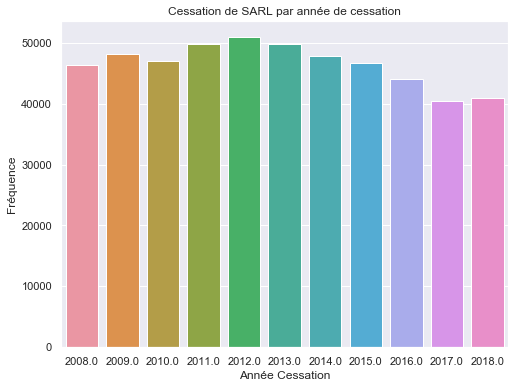

In [7]:
plt.figure(figsize=(8,6))
sarl_c = sarl[sarl['etatAdministratifUniteLegale']=='C']
sns.countplot(x = 'annee_cessation', data = sarl_c)
plt.xlabel("Année Cessation")
plt.ylabel("Fréquence")
plt.title("Cessation de SARL par année de cessation")

In [8]:
print(pd.crosstab(sarl_c.etatAdministratifUniteLegale, sarl.annee_cessation))

annee_cessation               2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  \
etatAdministratifUniteLegale                                                   
C                              46361   48060   46995   49768   50980   49758   

annee_cessation               2014.0  2015.0  2016.0  2017.0  2018.0  
etatAdministratifUniteLegale                                          
C                              47739   46738   44020   40450   40846  


Test de Segmentation de variable par KMeans

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_train = test[['age_unite_legale','Etat_C']]

from scipy.spatial.distance import cdist

distorsions = []

for i in np.arange(1,8):
    cluster = KMeans(n_clusters = i)
    cluster.fit(X_train)
    distorsions.append(sum(np.min(cdist(X_train, cluster.cluster_centers_, 'euclidean'), axis = 1)) / np.size(X_train, axis = 0))

#pd.crosstab(kmeans.predict(X_train), X_train['Etat_C'], rownames=["Pred"], colnames=["Obs"])

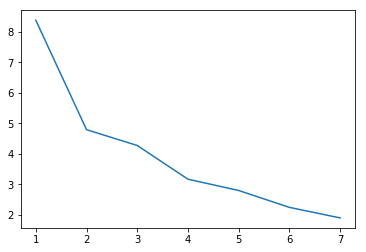

In [38]:
plt.plot(np.arange(1,8), distorsions)
plt.show()

In [27]:
X_train['Pred'] = kmeans.predict(X_train)

C:\Users\Square 769\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
X_train.groupby('Pred', as_index=False).agg({"anc_der_chg_cat_ju" : {"min_anc" : "min", "max_anc" : "max"}})

C:\Users\Square 769\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Pred anc_der_chg_cat_ju        
                  min_anc max_anc
0    0               -6.0     8.0
1    1               22.0    31.0
2    2               32.0   118.0
3    3                9.0    21.0

In [43]:
# Segmentation Age de l'entreprise
new_sarl = sarl_bis.reset_index()
test_den = pd.cut(new_sarl.age_unite_legale, [-1,6,11,20,999], labels = ['1-<6ans','2-<11ans','3-<20ans','4->20ans'])
#test_den = np.where(test_den.isna(),'missing',test_den)

new_sarl = new_sarl.join(test_den, rsuffix='_mod')

print(pd.crosstab(sarl_bis.etatAdministratifUniteLegale, test_den, normalize = 'columns'))

age_unite_legale               1-<6ans  2-<11ans  3-<20ans  4->20ans
etatAdministratifUniteLegale                                        
A                             0.978694   0.98123  0.984048  0.990402
C                             0.021306   0.01877  0.015952  0.009598
